In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



(1459,)
<class 'pandas.core.series.Series'>
DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='order_date', length=1459, freq='D')


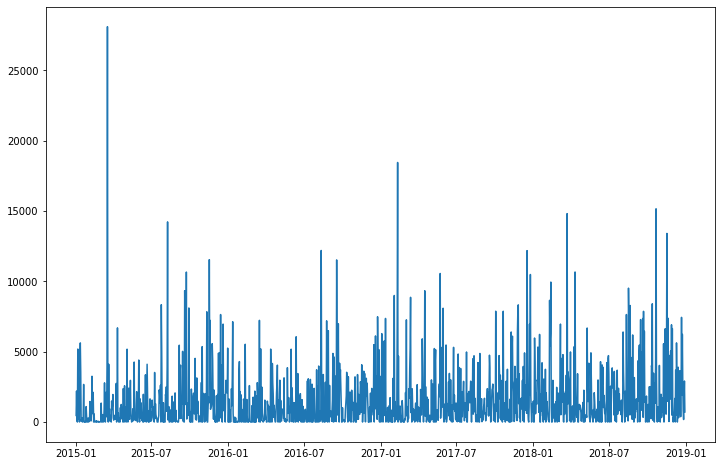

In [3]:
#데이터 불러오기

df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/Superstore_Sales_Dataset.csv')

# print(df.iloc[0]) # 데이터 확인

# Row ID                                           1
# Order ID                            CA-2017-152156
# Order Date                              08/11/2017
# Ship Date                               11/11/2017
# Ship Mode                             Second Class
# Customer ID                               CG-12520
# Customer Name                          Claire Gute
# Segment                                   Consumer
# Country                              United States
# City                                     Henderson
# State                                     Kentucky
# Postal Code                                42420.0
# Region                                       South
# Product ID                         FUR-BO-10001798
# Category                                 Furniture
# Sub-Category                             Bookcases
# Product Name     Bush Somerset Collection Bookcase
# Sales                                       261.96
# Name: 0, dtype: object

# print(df.shape) #(9800, 18) #쉐잎 확인
# print(df.info()) #인포 확인

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 9800 entries, 0 to 9799
# Data columns (total 18 columns):
#  #   Column         Non-Null Count  Dtype  
# ---  ------         --------------  -----  
#  0   Row ID         9800 non-null   int64  
#  1   Order ID       9800 non-null   object 
#  2   Order Date     9800 non-null   object 
#  3   Ship Date      9800 non-null   object 
#  4   Ship Mode      9800 non-null   object 
#  5   Customer ID    9800 non-null   object 
#  6   Customer Name  9800 non-null   object 
#  7   Segment        9800 non-null   object 
#  8   Country        9800 non-null   object 
#  9   City           9800 non-null   object 
#  10  State          9800 non-null   object 
#  11  Postal Code    9789 non-null   float64
#  12  Region         9800 non-null   object 
#  13  Product ID     9800 non-null   object 
#  14  Category       9800 non-null   object 
#  15  Sub-Category   9800 non-null   object 
#  16  Product Name   9800 non-null   object 
#  17  Sales          9800 non-null   float64
# dtypes: float64(2), int64(1), object(15)
# memory usage: 1.3+ MB
# None

# print(df.isna().sum()) #결측값이 있는지 확인

# Row ID            0
# Order ID          0
# Order Date        0
# Ship Date         0
# Ship Mode         0
# Customer ID       0
# Customer Name     0
# Segment           0
# Country           0
# City              0
# State             0
# Postal Code      11
# Region            0
# Product ID        0
# Category          0
# Sub-Category      0
# Product Name      0
# Sales             0
# dtype: int64

# print(df[df['Postal Code'].isna()]) #결측값이 있는 행 확인

# Burlington Vermont의 Postal Code는 5401이므로 null값을 채워줌
df['Postal Code'] = df['Postal Code'].fillna(5401)

# print(df.isna().sum()) #0


# #컬럼명 변경
df.rename(columns={
    'Row ID':'row_id',
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'Segment':'segment',
    'Country':'country',
    'City':'city',
    'State':'state',
    'Postal Code':'postal_code',
    'Region':'region',
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'sub-category',
    'Product Name':'product_name',
    'Sales':'sales'
},inplace=True)



# 날짜형 데이터로 변환
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

# print(df['ship_date'])
# print(df['order_date'])

# 일별로 전체 매출을 시계열로 묶음

data = df.groupby(['order_date'])['sales'].sum().sort_index()
# print(data)

# print(data.asfreq('D'))

data = data.asfreq('D') #비어있는 날짜(매출이 발생하지 않은 날짜)를 날짜만 채워넣음
# print(data)

data = data.fillna(0) # 새로 추가된 날짜는 데이터가 null이므로 0을 삽입
# print(data[data.values==0]) # 데이터가 0인 날짜  2015-01-05    0.0 2015-01-17    0.0 2015-01-21  ...
# print(len(data[data.values==0])) # 229


print(data.shape) #(1459,)
print(type(data)) #<class 'pandas.core.series.Series'>

print(data.index)

x = data.index.to_numpy().reshape(-1,1)
y = data.values.reshape(-1,1)


# #####################라벨 인코더
# from sklearn.preprocessing import LabelEncoder

# # 라벨 인코더 생성
# encoder = LabelEncoder()

# # X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
# encoder.fit(x)
# x = encoder.transform(x)
# x = x.reshape(-1,1)


# print(y)
# print(x)
# print(y)
# print(type(x)) #<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
# print(type(y)) #<class 'numpy.ndarray'>
# print(x.shape, y.shape) #(1459,)


# 데이터 시각화
plt.figure(figsize=(12,8))
fig = plt.plot(data)


In [4]:
data

order_date
2015-01-02     468.9000
2015-01-03    2203.1510
2015-01-04     119.8880
2015-01-05       0.0000
2015-01-06    5188.5200
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Freq: D, Name: sales, Length: 1459, dtype: float64

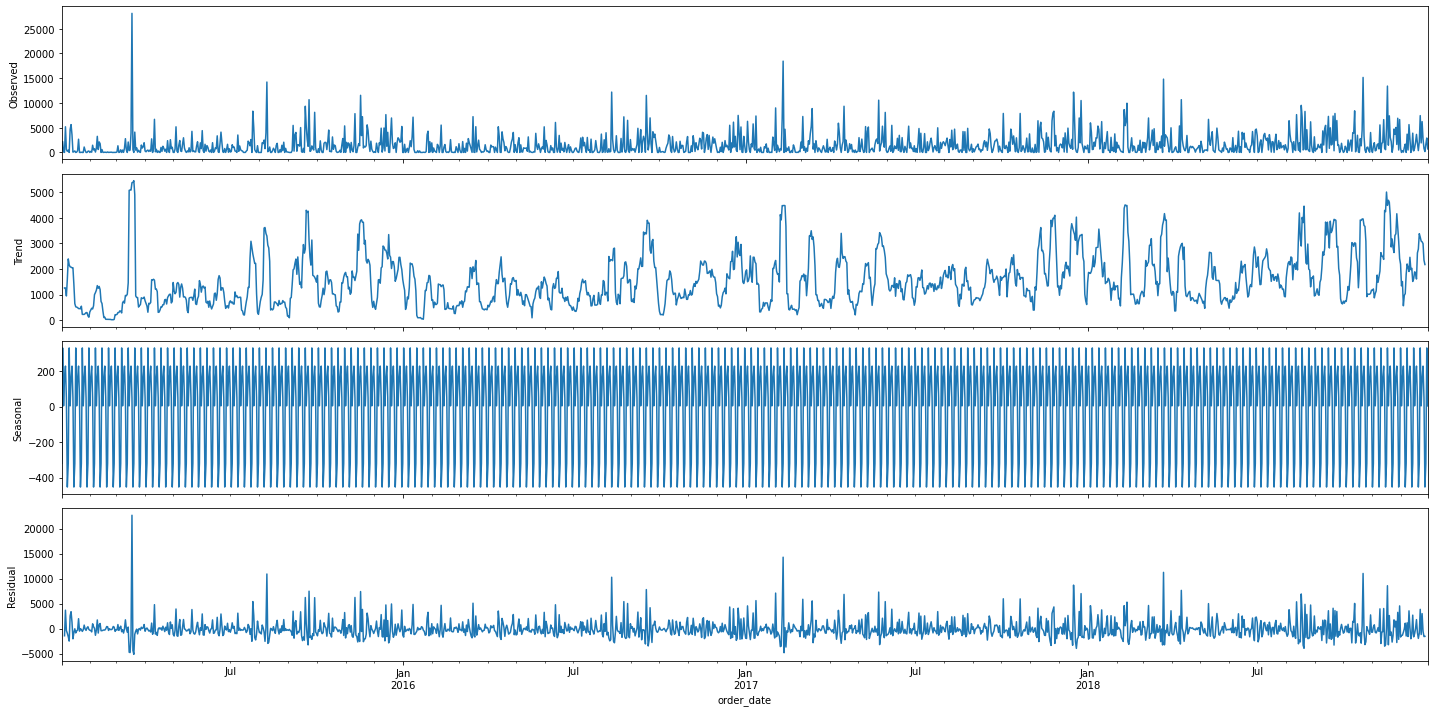

In [ ]:
# 2. 시즈널 디컴포즈

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig =decomposition.plot()
plt.show()


In [ ]:

# LSTM



import math
import keras
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping



In [ ]:
# # train test 분리

# # train_data,train_label,test_data,test_label = train_test_split(x,y, test_size=0.2, shuffle=False) #랜덤으로 섞이지 않도록 false
# train_data,test_data,train_label,test_label= train_test_split(x,y, test_size=0.2, shuffle=False) #랜덤으로 섞이지 않도록 false

# print(train_data)#2015-01-02     468.900 ~ 2018-03-13    4791.350
# print(test_data)#2015-01-02     468.900 ~ 2018-03-13    4791.350

# print(train_label) #2018-03-14      49.6160 ~ 2018-12-30     713.7900

# print(train_data.shape) #(1167, 1)
# print(train_label.shape) #(1167, 1)

In [ ]:
# train_data.shape, train_label.shape

# print(train_data[:5]) # 2차원 배열
# print(test_data[:5]) # 2차원 배열


#####Prophet


In [ ]:

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_validate, train_test_split # train,test
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler     # 정규화,표준화작업
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib
# import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")
from fbprophet import Prophet

In [ ]:
# 2. 데이터 확인
# 일반 머신러닝은 train_data, test_data를 분리해서 러닝후 예측
# 시계열 예측은 특정 시점을 가지고 데이터를 분리
# 이전까지의 10일 train_data, next 5일을 test_data로 분리
# tail 향후 5일이 됨.

print(data.tail())

order_date
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Freq: D, Name: sales, dtype: float64


In [ ]:
# prophet 사용을 위한 데이터프레임 컬럼명 변경
data_prophet = df.groupby(['order_date'])['order_date','sales'].sum().sort_index()
data_prophet = data_prophet.reset_index()

# print(data_prophet['order_date'])
# print(data_prophet['sales'])
data_prophet.rename(columns={'order_date':'ds','sales' : 'y' },inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
m=Prophet(
    changepoint_prior_scale=0.65,   # 값이 커질수록 모델을 유연하게 만든다
    changepoint_range=0.80,   # 데이터 앞쪽 몇 퍼센트 부분 안에서 변화점을 만들것인지 설정
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive'
)


In [ ]:
m.fit(data_prophet)


In [ ]:
# prophet 을 이용하여 미래예측할 범위 설정
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)

# fig = plt.plot(m, forecast)

# print('m:',m)
print('forcast:',forecast[-10:-5])


# order_date
# 2018-12-26     814.5940
# 2018-12-27     177.6360
# 2018-12-28    1657.3508
# 2018-12-29    2915.5340
# 2018-12-30     713.7900

#  yhat  
# 1225                         0.0  2632.906705  
# 1226                         0.0  2435.938234  
# 1227                         0.0  2553.198997  
# 1228                         0.0  2928.352235  
# 1229                         0.0  2522.588644 



m: <fbprophet.forecaster.Prophet object at 0x7fba1ae85210>
forcast:              ds        trend  yhat_lower   yhat_upper  trend_lower  \
1225 2018-12-26  2111.135271 -106.982790  5473.080419  2111.135271   
1226 2018-12-27  2113.756257 -292.844344  5221.725659  2113.756257   
1227 2018-12-28  2116.377242 -479.685457  5314.951083  2116.377242   
1228 2018-12-29  2118.998227 -246.743924  5857.118534  2118.998227   
1229 2018-12-30  2121.619212 -331.762769  5372.608524  2121.619212   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1225  2111.135271      521.771434            521.771434            521.771434   
1226  2113.756257      322.181977            322.181977            322.181977   
1227  2116.377242      436.821755            436.821755            436.821755   
1228  2118.998227      809.354008            809.354008            809.354008   
1229  2121.619212      400.969432            400.969432            400.969432   

           daily  daily_

In [ ]:
forecast.columns
print(forecast['yhat'][-10:-5])

yhat= forecast['yhat'][-10:-5]
yreal = data.tail()

print(data.tail())

1225    2632.906705
1226    2435.938234
1227    2553.198997
1228    2928.352235
1229    2522.588644
Name: yhat, dtype: float64
order_date
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Freq: D, Name: sales, dtype: float64


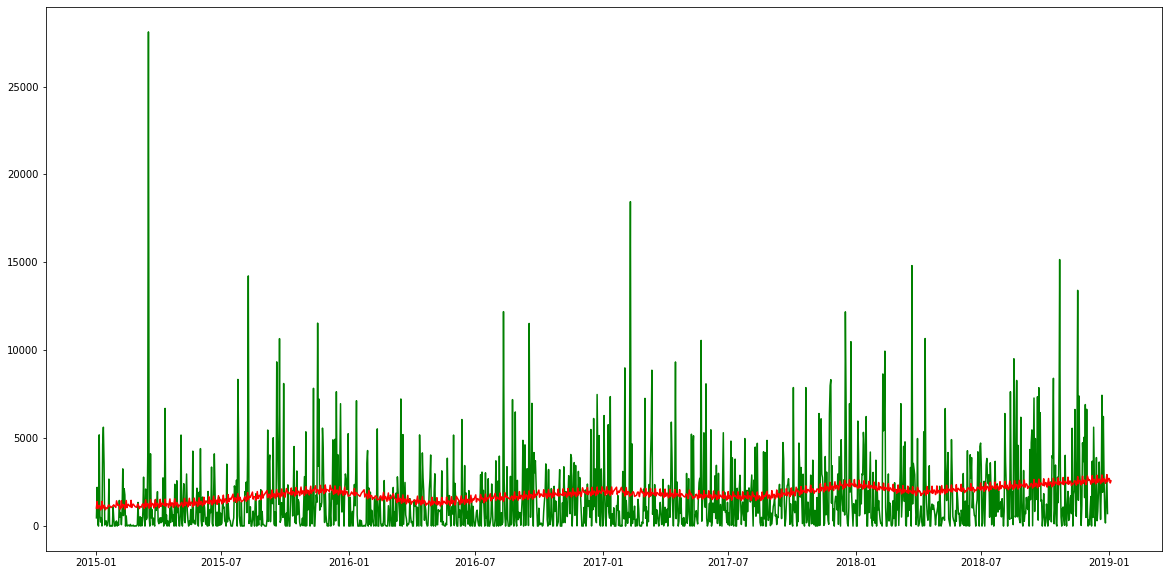

In [ ]:
# plt.plot(forecast['ds'],forecast['yhat'],color='green')


plt.plot(x,y, 'g-') #예측값
plt.plot(forecast['ds'],forecast['yhat'], 'r-') #실제값
plt.show()

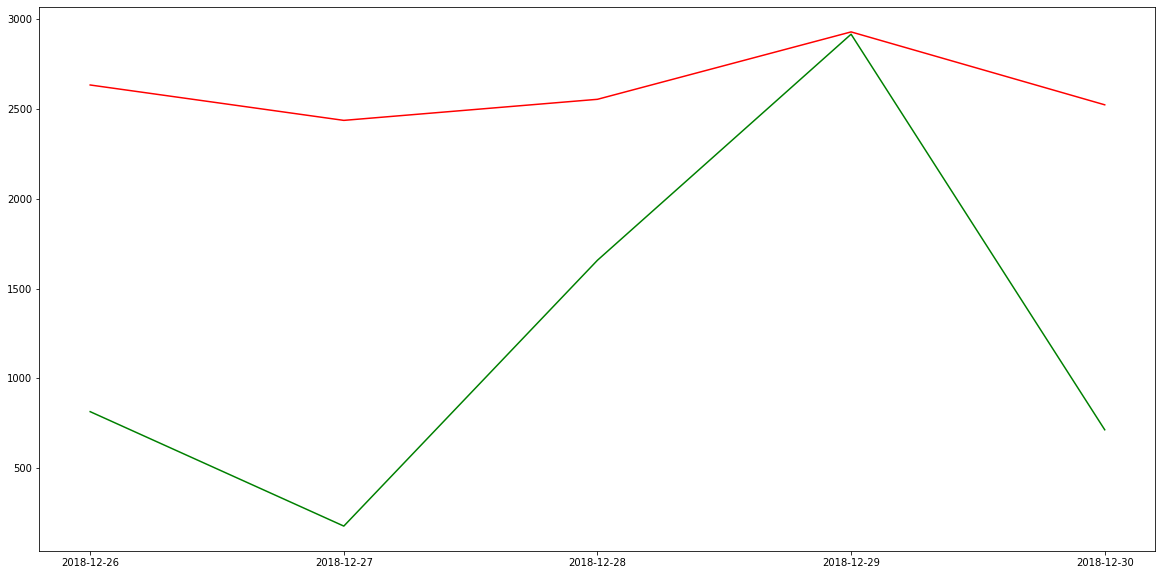

In [ ]:
# plt.plot(x,y,color='gold')
# plt.plot(['2018-12-26','2018-12-27','2018-12-28','2018-12-29','2018-12-30'],yreal, ['2018-12-26','2018-12-27','2018-12-28','2018-12-29','2018-12-30'],yhat, 'r-')
plt.plot(['2018-12-26','2018-12-27','2018-12-28','2018-12-29','2018-12-30'],yreal, 'g-') #실제값
plt.plot(['2018-12-26','2018-12-27','2018-12-28','2018-12-29','2018-12-30'],yhat, 'r-') #예측값
plt.show()

In [ ]:
data.mean()

1550.0594809458535

In [ ]:

import pandas as pd
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(yhat,yreal,squared=False)
mse = mean_squared_error(yhat,yreal)
rmse_2 = mse ** 0.5
print('mse',mse,'rmse',rmse)
print('rmse',rmse_2)

mse 2496130.1817899994 rmse 1579.9146121832025
rmse 1579.9146121832025
